# **8 Schools Example**

# Walk-through of this example is in the README

# **Original Numpyro Example**

In [11]:
!pip install numpyro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import numpyro
import numpyro.distributions as dist
import numpy as np
from jax import random
from numpyro.infer import MCMC, NUTS

# Defining data
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# Eight Schools original numpyro model definition
def eight_schools(J, sigma, y=None):
  mu = numpyro.sample('mu', dist.Normal(0, 5))
  tau = numpyro.sample('tau', dist.HalfCauchy(5))
  with numpyro.plate('J', J):
    theta = numpyro.sample('theta', dist.Normal(mu, tau))
    numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

#running MCMC
nuts_kernel = NUTS(eight_schools)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, J, sigma, y=y, extra_fields=('potential_energy',))
mcmc.print_summary()

sample: 100%|██████████| 1500/1500 [00:07<00:00, 190.11it/s, 31 steps of size 4.85e-02. acc. prob=0.99]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.30      3.44      4.23     -1.68      8.96    158.83      1.01
       tau      4.05      3.45      2.97      0.29      8.29     70.21      1.02
  theta[0]      6.41      5.66      5.74     -2.99     14.52    213.16      1.01
  theta[1]      5.16      4.92      4.98     -2.10     13.42    250.40      1.01
  theta[2]      3.70      5.47      3.73     -5.71     11.76    324.69      1.00
  theta[3]      4.83      5.32      4.52     -2.80     13.70    331.97      1.00
  theta[4]      3.49      4.95      3.68     -4.69     11.44    211.57      1.00
  theta[5]      3.96      5.10      4.24     -3.66     12.65    298.62      1.01
  theta[6]      6.75      5.52      6.05     -1.46     15.60    155.36      1.01
  theta[7]      5.07      5.31      4.80     -3.16     13.83    232.52      1.02

Number of divergences: 1


# **Installing Numpyro Node Model dependancies & repository**

In [13]:
!git clone https://github.com/noahnisbet/numpyronodemodels.git
!pip install numpyro
!pip install funsor

fatal: destination path 'numpyronodemodels' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Before running this cell put setup.py and numpyronodemodel.py in current directory. I am using google colab so simply click on the folder icon. Find the numpyronodemodels directory and drag setup.py and numpyronodemodels.py into base directory.

In [14]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '0.1dev' to '0.1.dev0'
  warnings.warn(tmpl.format(**locals()))
running install
running bdist_egg
running egg_info
writing numpyronodemodels.egg-info/PKG-INFO
writing dependency_links to numpyronodemodels.egg-info/dependency_links.txt
writing top-level names to numpyronodemodels.egg-info/top_level.txt
reading manifest file 'numpyronodemodels.egg-info/SOURCES.txt'
writing manifest file 'numpyronodemodels.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
copying build/lib/numpyronodemodels.py -> build/bdist.linux-x86_64/egg
byte-compiling build/bdist.linux-x86_64/egg/numpyronodemodels.py to numpyronodemodels.cpython-37.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying numpyronodemodels.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying numpyronodemodels.egg-info/SOURCES.txt -

# **Numpyro Node Models Exmaple**

In [15]:
from numpyronodemodels import NodeModel, NodeToSklearn

# Defining Data
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# creating eight_schools NodeModel object and passing sigma in constructor because it is constant.
eight_schools = NodeModel(model_args = {'sigma':sigma})

# Defining the plate used with theta and obs
J_plate = numpyro.plate('J',J)

# Creating the nodes mu and tau with their respective prior distributions
eight_schools.add_node(name = 'mu',
                       prior_distribution = dist.Normal(0,5))
eight_schools.add_node(name = 'tau',
                       prior_distribution = dist.HalfCauchy(5))

# Defining the theta node function
def eight_school_theta_node_function(mu, tau, sigma):
 return dist.Normal(mu, tau)

# creating the theta node using the theta node function and the J plate
eight_schools.add_node(name = 'theta',
                       node_function=eight_school_theta_node_function,
                       plate = (J_plate,))

# Defining the obs node function
def eight_school_obs_node_function(theta, sigma):
 return dist.Normal(theta, sigma)

# creating the theta node using the obs node function and the J plate
eight_schools.add_node(name = 'obs',
                       node_function=eight_school_obs_node_function,
                       plate = (J_plate,))

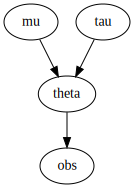

In [16]:
# creating numpyro model
numpyro_traditional_model = eight_schools.create_model()

# showing the error with render model.
# plate is not showing BUT IT IS THERE
numpyro.render_model(numpyro_traditional_model)

In [17]:
from jax import random
from numpyro.infer import MCMC, NUTS

# conditioning / observing the obs node with the values in y.
conditioning_data = {'obs':y}
conditioned_numpyro_traditional_model = numpyro.handlers.condition(numpyro_traditional_model, data=conditioning_data)

# Runnning MCMC below with same output as original :)
nuts_kernel = NUTS(conditioned_numpyro_traditional_model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, extra_fields=('potential_energy',))
mcmc.print_summary()

sample: 100%|██████████| 1500/1500 [00:05<00:00, 253.28it/s, 31 steps of size 4.85e-02. acc. prob=0.99]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.30      3.44      4.23     -1.68      8.96    158.83      1.01
       tau      4.05      3.45      2.97      0.29      8.29     70.21      1.02
  theta[0]      6.41      5.66      5.74     -2.99     14.52    213.16      1.01
  theta[1]      5.16      4.92      4.98     -2.10     13.42    250.40      1.01
  theta[2]      3.70      5.47      3.73     -5.71     11.76    324.69      1.00
  theta[3]      4.83      5.32      4.52     -2.80     13.70    331.97      1.00
  theta[4]      3.49      4.95      3.68     -4.69     11.44    211.57      1.00
  theta[5]      3.96      5.10      4.24     -3.66     12.65    298.62      1.01
  theta[6]      6.75      5.52      6.05     -1.46     15.60    155.36      1.01
  theta[7]      5.07      5.31      4.80     -3.16     13.83    232.52      1.02

Number of divergences: 1
